In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as img
import astropy.io.fits as fits
import lsst.daf.persistence as dp
import lsst.afw.display as display
import lsst.afw.display.rgb as rgb
import lsst.afw.image as afwImage
from PostageStampMaker import PostageStampMaker, create_postage_stamps
from Display import render_fits_image
%matplotlib inline

plt.ion()
plt.rcParams['figure.figsize'] = (10, 10)

/Users/Bryce/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/Users/Bryce/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


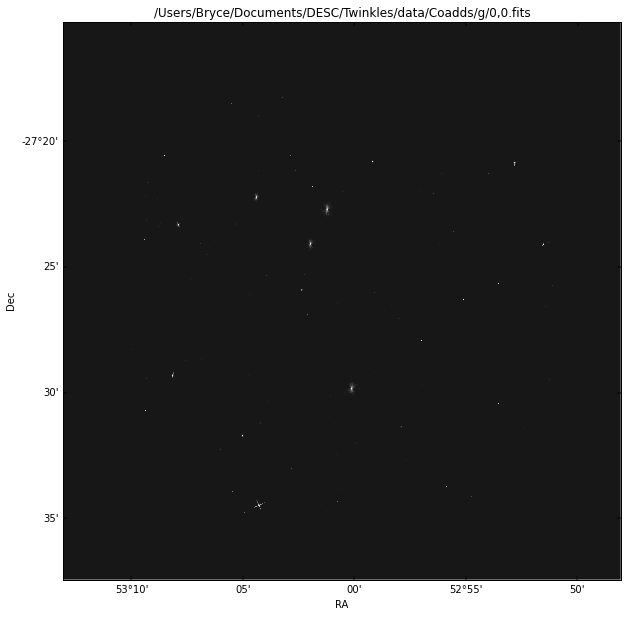

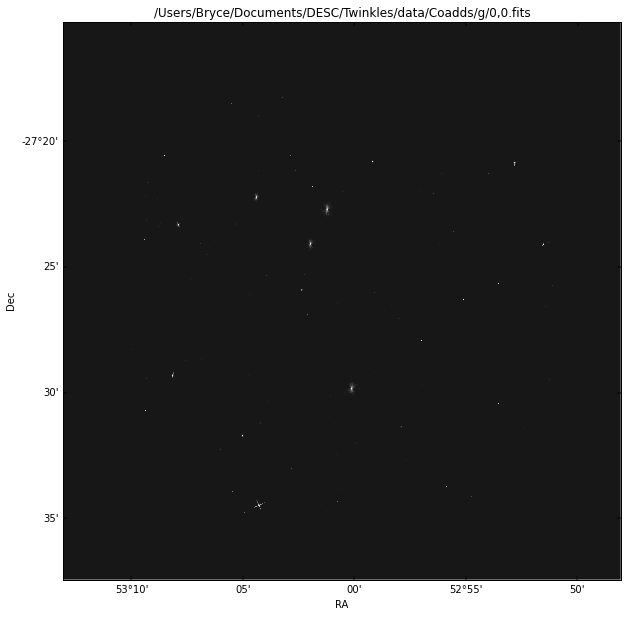

In [2]:
# Display the test image.
exposure_file1 = os.path.join('/Users/Bryce/Documents/DESC/Twinkles/', 'data/Coadds/g', '0,0.fits')
image1 = fits.open(exposure_file1)
render_fits_image(image1[1], title=exposure_file1)

6419.96
3886.19
5566.79
(60, 60, 3)


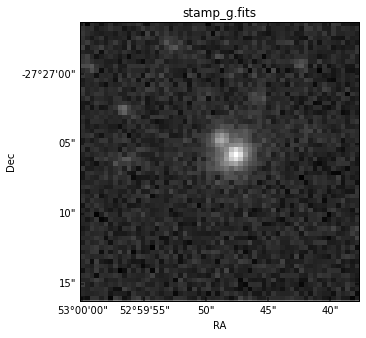

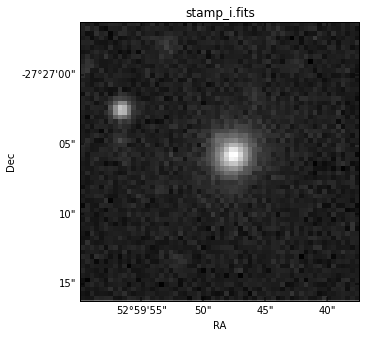

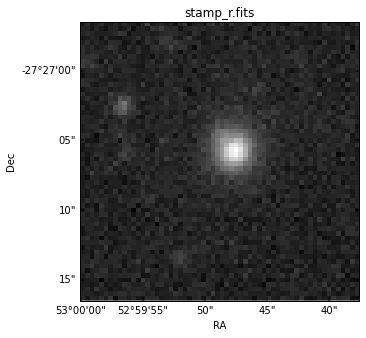

In [25]:
# Create a series of postage stamps from a list of 5 Exposure
# FITS files (using the test image as a proxy for all five) 
# and display each.
plt.rcParams['figure.figsize'] = (5, 5)
dataFolder = '../../data/Coadds/'#'/Users/Bryce/Documents/DESC/Twinkles/data/Coadds/'
expfiles=[]
bandpassFiles = {}
filterNames = []
for folderName in os.listdir(dataFolder):
    for fileName in os.listdir(str(dataFolder+folderName)):
        expfiles.append(str(dataFolder+folderName+'/'+fileName))
        bandpassFiles[folderName] = str(dataFolder+folderName+'/'+fileName)
        filterNames.append(folderName)
#loc0 = [52.9252737, -27.5212009]
loc0 = [52.9968499, -27.4517142]
ra = [loc0[0]]
dec = [loc0[1]]
size = 20
rgb_dict = {}
for ra_i, dec_i in zip(ra,dec):
    stamps = create_postage_stamps(ra_i, dec_i, size, expfiles)
    for i, stamp in enumerate(stamps):
        outfile = 'stamp_%s.fits' % filterNames[i]
        stamp.writeFits(outfile)
        fits_obj = fits.open(outfile)
        fig = render_fits_image(fits_obj[1], title=outfile)
        rgb_dict[filterNames[i]] = fits_obj[1].data
        plt.savefig('stamp_%i.png' % (i))
    rgb_data = np.zeros((np.shape(rgb_dict['i'])[0], np.shape(rgb_dict['i'])[1], 3))
    for j,filterName in enumerate(['i', 'g', 'r']):
        print np.max(rgb_dict[filterName])
        rgb_data[:,:,j] = rgb_dict[filterName]/18#/111.99#np.max(rgb_dict[filterName])
    #rgb_data = np.array((rgb_dict['i'], rgb_dict['r'], rgb_dict['g']))
print np.shape(rgb_data)
#plt.imshow(rgb_data, origin='lower')#, norm=mpl.colors.LogNorm(), interpolation=None)
    #img.imsave('stamp_rgb.png', rgb_data.T)

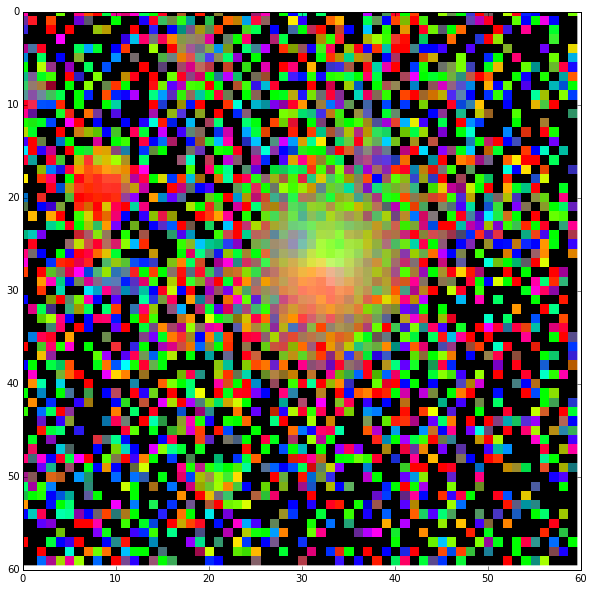

In [26]:
# get a butler
#butler = dp.Butler('/Users/Bryce/Documents/DESC/Twinkles/data/')
#dataId = {'tract':0, 'patch':'0,0'}

bandpass_color_map = {'green':'r', 'red':'i', 'blue':'g'}

# get ref catalog
#refs = {}
exposures = {}
for bandpass in bandpass_color_map.itervalues():
#    dataId['filter'] = bandpass
#    refs[bandpass] = butler.get('deepCoadd_ref', dataId=dataId)
#    exposures[bandpass] = butler.get('deepCoadd', dataId=dataId)
#    exposures[bandpass] = afwImage.ExposureF(bandpassFiles[bandpass])
    expName = 'stamp_%s.fits' % bandpass
    exposures[bandpass] = afwImage.ExposureF(expName)

rgb_im = rgb.makeRGB(*(exposures[bandpass_color_map[color]].getMaskedImage().getImage()
                       for color in ('red', 'green', 'blue')))

item = exposures.popitem()
dims = item[1].getDimensions()
exposures.update((item,))

fig = plt.figure(figsize=(10,10))
plt.imshow(rgb_im, interpolation='nearest')
# Uncomment the following line to plot the detections
#plt.scatter(refs['g'].getX(), dims[1]-refs['g'].getY(), edgecolors='none', alpha=0.3)
plt.xlim(0, dims[0])
plt.ylim(dims[1], 0)
plt.show()